In [1]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [2]:
MET_res = "/media/cap/extra_work/CERISE/MET_CARRA1_vs_IMS"
all_results = os.listdir(MET_res)
results = OrderedDict()
for f in all_results:
    
    if f.endswith("_cts.txt"):
        read_date = f.split("_")[3]
        results[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    elif f.endswith(".nc"):
        ncfile = f
    

In [3]:
len(results.keys())


30

#### PODY: is the probabily of detection. It  is the hit rate (HR)
####  POFS is the probabiliy of false detection. It is the false alarm rate (FAR)
#### ACC is the  accuracy

In [4]:
#PODY: is the probabily of detection. IT is the false alarm rate
# 
check_date="20160901"
pod_cols = [col for col in results[check_date].columns if "POD" in col]
pof_cols = [col for col in results[check_date].columns if "POF" in col]
#acc_cols = [col for col in results["20160510"].columns if "ACC" in col]
fss_cols = [col for col in results[check_date].columns if "FSS" in col]
acc_cols = [col for col in results[check_date].columns if "ANOM_CORR" in col]

In [5]:
pod_cols

['PODY',
 'PODY_NCL',
 'PODY_NCU',
 'PODY_BCL',
 'PODY_BCU',
 'PODN',
 'PODN_NCL',
 'PODN_NCU',
 'PODN_BCL',
 'PODN_BCU']

In [6]:
pof_cols

['POFD', 'POFD_NCL', 'POFD_NCU', 'POFD_BCL', 'POFD_BCU']

In [7]:
acc_cols

[]

In [8]:
fss_cols

[]

In [9]:
results[check_date][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"PODY","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,PODY,VX_MASK
0,0,20160901_000000,20160901_000000,0,19700101_000000,19700101_000000,0.74839,FULL
1,0,20160901_000000,20160901_000000,0,19700101_000000,19700101_000000,0.62500,NOR_SCAN


In [10]:
results[check_date]["VX_MASK"]

0        FULL
1    NOR_SCAN
Name: VX_MASK, dtype: object

### Collect the values for all dates and take the PODY


In [11]:
REGION = "FULL"

hit_dict=OrderedDict()

for label in ["datetime","hit_rate"]:
    hit_dict[label] = []
for key_date in results.keys():
    df_sel = results[key_date][results[key_date]["VX_MASK"]  == REGION]
    hit_dict["hit_rate"].append(df_sel["PODY"].values[0])
    hit_dict["datetime"].append(datetime.strptime(df_sel["FCST_VALID_BEG"].values[0],"%Y%m%d_%H%M%S"))

### find fraction skill score

In [12]:
fss_files=OrderedDict()
for f in all_results:
    
    if f.endswith("_nbrcnt.txt"):
        read_date = f.split("_")[3]
        fss_files[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [13]:
fss_files.keys()

odict_keys(['20160925', '20160927', '20160929', '20160930', '20160913', '20160922', '20160919', '20160926', '20160904', '20160917', '20160928', '20160906', '20160908', '20160920', '20160914', '20160923', '20160902', '20160912', '20160921', '20160915', '20160916', '20160903', '20160901', '20160905', '20160918', '20160907', '20160924', '20160910', '20160911', '20160909'])

In [14]:
# other columns
fss_files[check_date].columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [15]:
fss_files[check_date][["VX_MASK","INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

,VX_MASK,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,FULL,1,0.64098,0,20160901_000000,20160901_000000
1,NOR_SCAN,1,0.40000,0,20160901_000000,20160901_000000
2,FULL,9,0.75728,0,20160901_000000,20160901_000000
3,NOR_SCAN,9,0.62387,0,20160901_000000,20160901_000000
4,FULL,25,0.78513,0,20160901_000000,20160901_000000
5,NOR_SCAN,25,0.64806,0,20160901_000000,20160901_000000
6,FULL,49,0.79604,0,20160901_000000,20160901_000000
7,NOR_SCAN,49,0.64210,0,20160901_000000,20160901_000000


In [16]:
fss_cols = [col for col in fss_files[check_date].columns if "FSS" in col]
fss_cols

['FSS',
 'FSS_BCL',
 'FSS_BCU',
 'AFSS',
 'AFSS_BCL',
 'AFSS_BCU',
 'UFSS',
 'UFSS_BCL',
 'UFSS_BCU']

In [17]:
fss_files[check_date][["FSS"]]

,FSS
0,0.64098
1,0.40000
2,0.75728
3,0.62387
4,0.78513
5,0.64806
6,0.79604
7,0.64210


### Plot the FSS for a given domain

In [18]:
date_sel = check_date
get_fss_all = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "FULL"]
get_fss_nor_scan = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "NOR_SCAN"]

fss_all = get_fss_all[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

In [19]:
fss_all

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,1,0.64098,0,20160901_000000,20160901_000000
2,9,0.75728,0,20160901_000000,20160901_000000
4,25,0.78513,0,20160901_000000,20160901_000000
6,49,0.79604,0,20160901_000000,20160901_000000


In [20]:
fss_nor_scan = get_fss_nor_scan[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]
fss_nor_scan

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
1,1,0.40000,0,20160901_000000,20160901_000000
3,9,0.62387,0,20160901_000000,20160901_000000
5,25,0.64806,0,20160901_000000,20160901_000000
7,49,0.64210,0,20160901_000000,20160901_000000


In [21]:
for _,r in fss_all.iterrows():
    print(r["FSS"])

0.64098
0.75728
0.78513
0.79604


In [22]:
df_fss_full = pd.DataFrame(columns=["date","points","fss"])
df_fss_nor_scan = pd.DataFrame(columns=["date","points","fss"])


In [23]:
for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "FULL"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)

for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "NOR_SCAN"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_nor_scan=pd.concat([df_fss_nor_scan,data_row],ignore_index=True)

/tmp/ipykernel_221679/3059115965.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)
/tmp/ipykernel_221679/3059115965.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_nor_scan=pd.concat([df_fss_nor_scan,data_row],ignore_index=True)


In [24]:
df_fss_full.dtypes

date      datetime64[ns]
points            object
fss              float64
dtype: object

In [25]:
df_fss_full["day"] = df_fss_full["date"].dt.strftime('%Y-%m-%d')

In [26]:
df_fss_full

,date,points,fss,day
0,2016-09-25 00:00:00,1,0.64380,2016-09-25
1,2016-09-25 00:00:00,9,0.74627,2016-09-25
2,2016-09-25 00:00:00,25,0.76951,2016-09-25
3,2016-09-25 00:00:00,49,0.78049,2016-09-25
4,2016-09-27 06:00:00,1,0.77716,2016-09-27
...,...,...,...,...
115,2016-09-11 06:00:00,49,0.94670,2016-09-11
116,2016-09-09 06:00:00,1,0.80842,2016-09-09
117,2016-09-09 06:00:00,9,0.91171,2016-09-09
118,2016-09-09 06:00:00,25,0.93637,2016-09-09


In [27]:
#df_fss_nor_scan["day"] = df_fss_nor_scan["date"].dt.strftime('%Y-%m-%d')
pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')


In [28]:
#pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')


In [29]:
from matplotlib.colors import LinearSegmentedColormap


# Create custom colormap (red to green)
colors = ['red', 'green']
n_bins = 10  # Number of color gradients
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

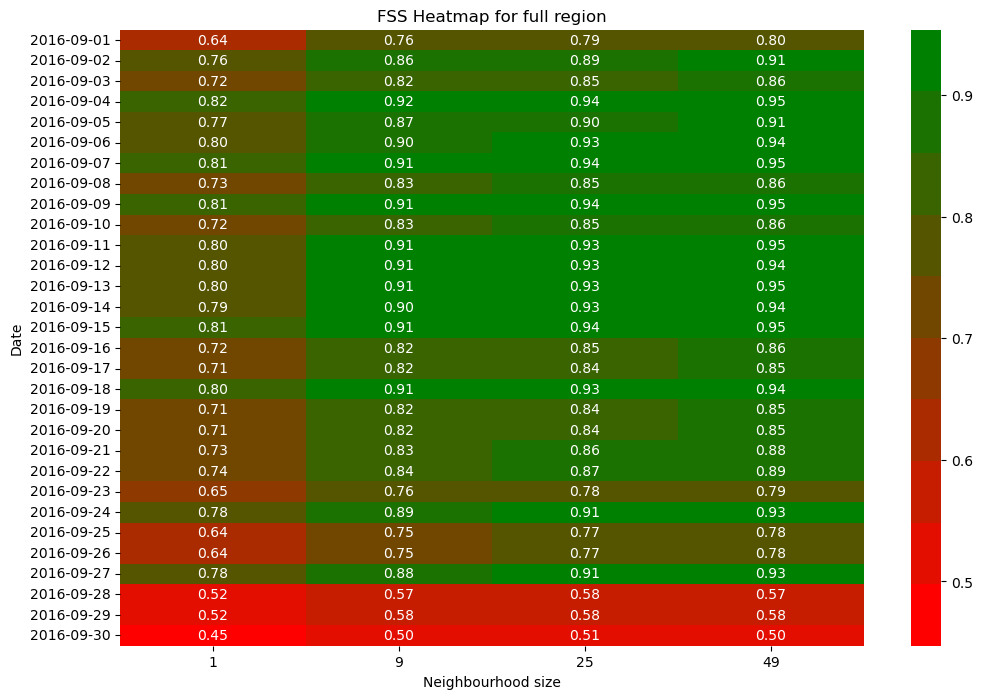

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#cmap = "viridis"
#cmap = "coolwarm"

#pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title(f'FSS Heatmap for full region')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()

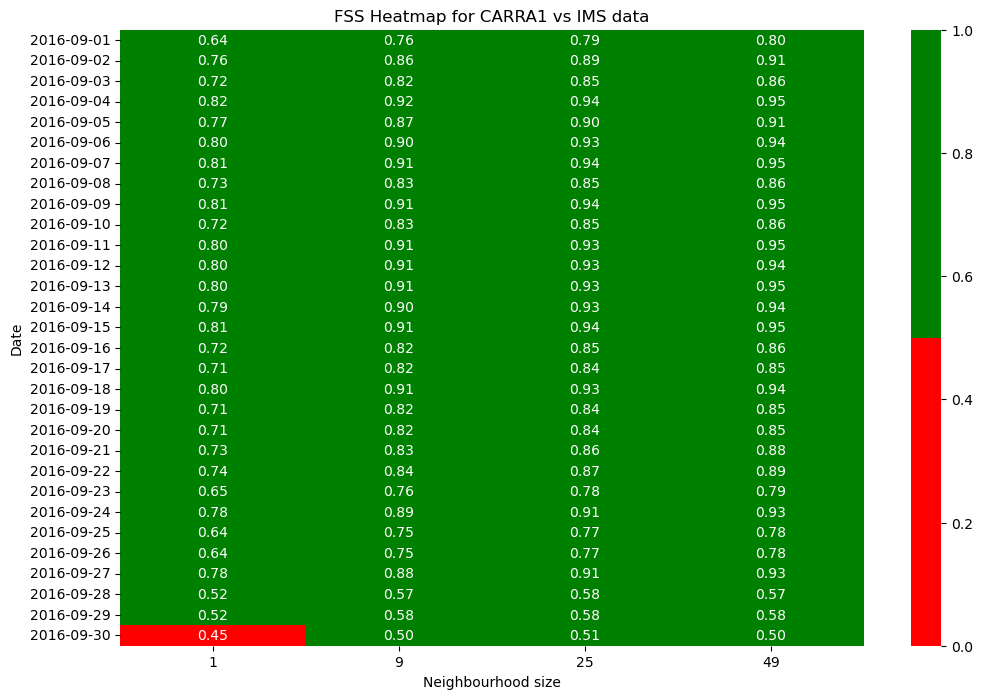

In [33]:
# make a reduced version

import matplotlib.colors as mcolors
# Create a custom colormap with red for values < 0.5 and green for values >= 0.5
colors = ['red', 'green']
n_bins = 2  # We only want two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create a mask for values >= 0.5
mask_high = pivot_df >= 0.5
mask_low = pivot_df < 0.5

# Plot the heatmap with custom colormap
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=custom_cmap,
            vmin=0, vmax=1,  # Set the range of values
            center=0.5)      # Set the center point for color transition

plt.title('FSS Heatmap for CARRA1 vs IMS data')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')
plt.savefig('fss_heatmap_carra1.png', dpi=300, bbox_inches='tight')
plt.show()
